#task 3: heart disease prediction

**objective:**  
build a machine learning model to predict if a patient is likely to develop heart disease based on medical records.

**dataset:**  
heart disease cleveland dataset from kaggle (`heart.csv`)

**instructions:**
- clean and explore the data
- train logistic regression and decision tree models
- evaluate model using accuracy, roc curve, confusion matrix
- highlight important features


In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [26]:
#loading the dataset
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [27]:
#checking dataset info
df.info()

#checking for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [28]:
#basic info about data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


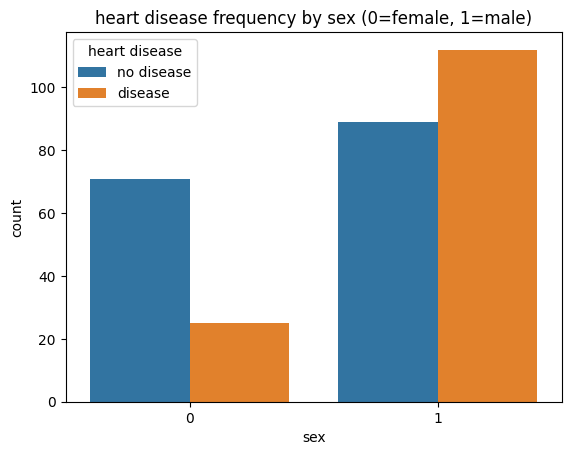

In [29]:
#plotting heart disease frequency by sex
sns.countplot(x='sex', hue='condition', data=df)
plt.title('heart disease frequency by sex (0=female, 1=male)')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='heart disease', labels=['no disease', 'disease'])
plt.show()


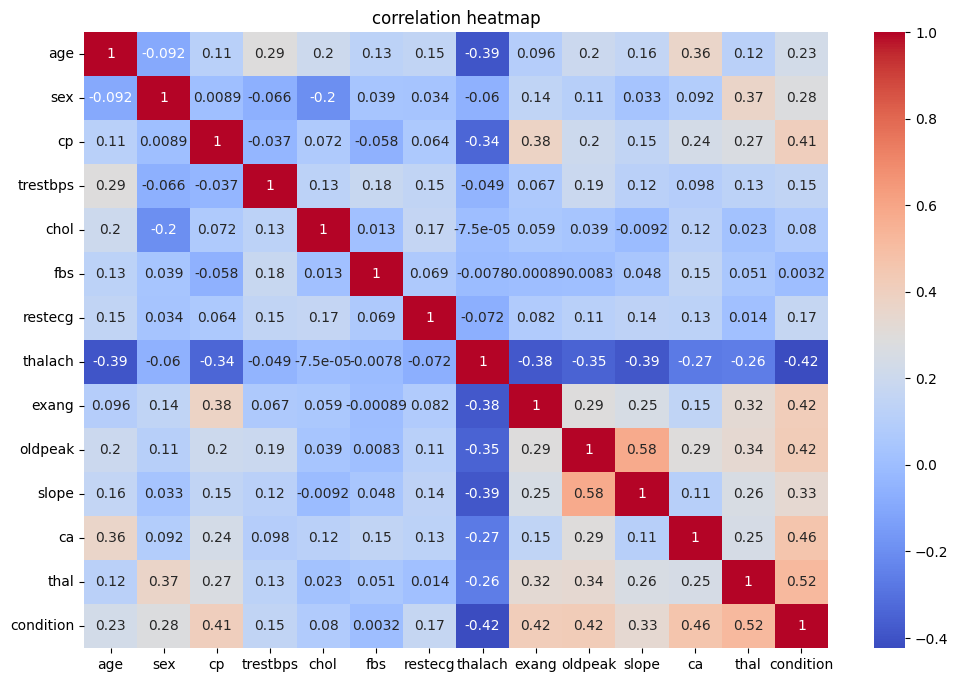

In [30]:
#plotting correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()


In [31]:
#splitting dataset into features and target
X = df.drop('condition', axis=1)
y = df['condition']

#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
#training logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

#predicting
y_pred_lr = lr_model.predict(X_test)


logistic regression accuracy: 0.7333333333333333
classification report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



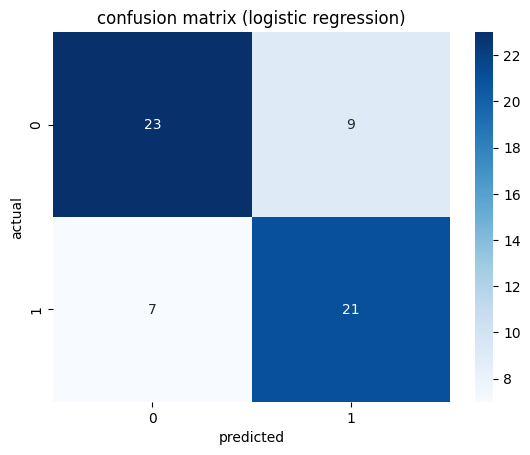

In [34]:
#evaluating logistic regression
acc_lr = accuracy_score(y_test, y_pred_lr)
print("logistic regression accuracy:", acc_lr)
print("classification report:\n", classification_report(y_test, y_pred_lr))

#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix (logistic regression)")
plt.show()


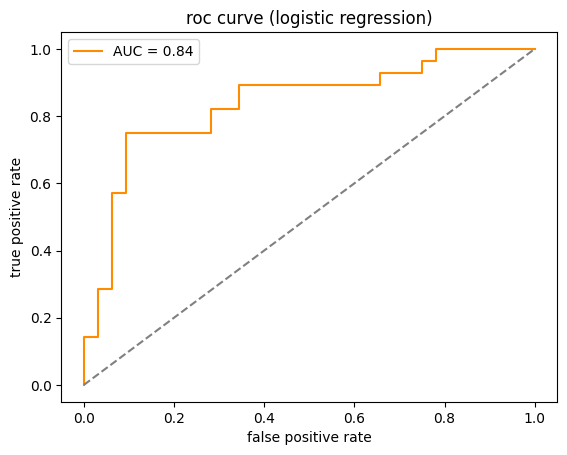

In [35]:
#plotting roc curve for logistic regression
y_prob_lr = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.plot(fpr, tpr, color='darkorange', label=f"AUC = {roc_auc_score(y_test, y_prob_lr):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve (logistic regression)")
plt.legend()
plt.show()


In [36]:
#training decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

#predicting
y_pred_tree = tree_model.predict(X_test)


decision tree accuracy: 0.7666666666666667
classification report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



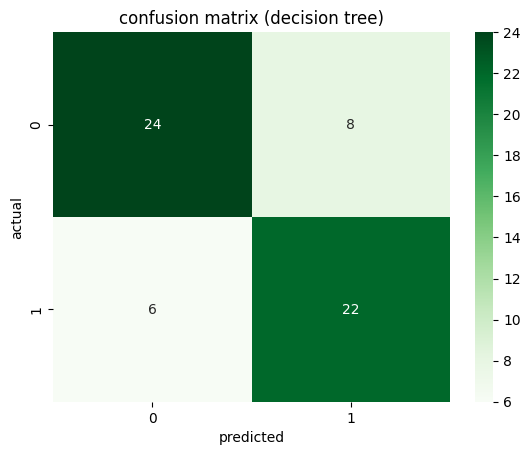

In [37]:
#evaluating decision tree
acc_tree = accuracy_score(y_test, y_pred_tree)
print("decision tree accuracy:", acc_tree)
print("classification report:\n", classification_report(y_test, y_pred_tree))

#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix (decision tree)")
plt.show()


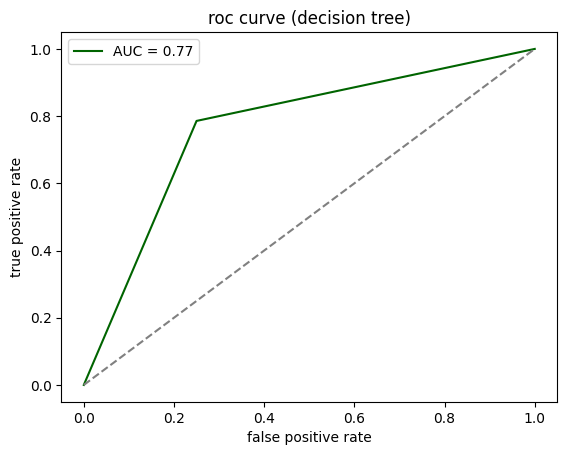

In [38]:
#plotting roc curve for decision tree
y_prob_tree = tree_model.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.plot(fpr_tree, tpr_tree, color='darkgreen', label=f"AUC = {roc_auc_score(y_test, y_prob_tree):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve (decision tree)")
plt.legend()
plt.show()


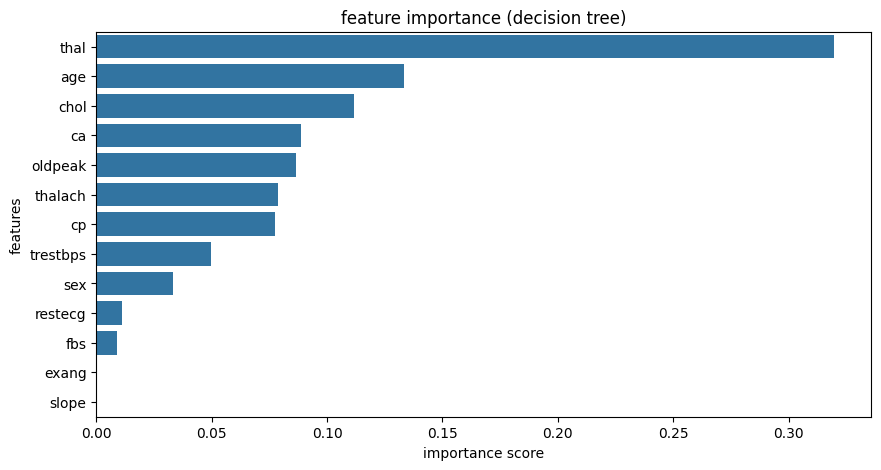

In [39]:
#getting feature importance from decision tree
feat_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

#plotting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("feature importance (decision tree)")
plt.xlabel("importance score")
plt.ylabel("features")
plt.show()
